# Stock Market Prediction And Forecasting Using Stacked LSTM

## Get Data

### one way

In [71]:

import pandas as pd

In [57]:
key=''
stock = 'TCS.BSE'

In [58]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol='+ stock +'&outputsize=compact&apikey='+key#+'&datatype=csv'

In [59]:
import urllib.request

weburl = urllib.request.urlopen(url)
data = weburl.read()


In [60]:
from ast import literal_eval

data = literal_eval(data.decode('utf-8'))

In [61]:
# import json

# result = json.dumps(data, indent=4, sort_keys=True)

In [69]:
df = pd.DataFrame(data.get('Time Series (Daily)'))
df = df.T
df.head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
2021-04-30,3111.0,3132.7,3021.0,3038.3999,3038.3999,69616,0.0000,1.0
2021-04-29,3142.0,3156.3,3105.3999,3113.2,3113.2,62825,0.0000,1.0
2021-04-28,3143.0,3150.5,3112.0,3123.8,3123.8,39238,0.0000,1.0
2021-04-27,3103.0,3135.1001,3103.0,3131.6001,3131.6001,43362,0.0000,1.0
2021-04-26,3109.8,3151.95,3088.1001,3101.1001,3101.1001,96633,0.0000,1.0


In [67]:
df.columns

Index(['1. open', '2. high', '3. low', '4. close', '5. adjusted close',
       '6. volume', '7. dividend amount', '8. split coefficient'],
      dtype='object')

In [70]:
df = df.rename(columns={'1. open':'open','2. high':'high','3. low':'low','4. close':'close','6. volume':'volume'})
df = df [['open','high','low','close','volume']]
df.head()

,open,high,low,close,volume
2021-04-30,3111.0,3132.7,3021.0,3038.3999,69616
2021-04-29,3142.0,3156.3,3105.3999,3113.2,62825
2021-04-28,3143.0,3150.5,3112.0,3123.8,39238
2021-04-27,3103.0,3135.1001,3103.0,3131.6001,43362
2021-04-26,3109.8,3151.95,3088.1001,3101.1001,96633


### second way

In [72]:
import os

# os.environ['StockAPI1'] = ''
key = os.getenv('StockAPI1')


In [85]:
stock = 'TCS.BSE'

from datetime import datetime
sdate = datetime(2021,4,1)
edate = datetime(2021,4,30)

In [90]:

import pandas_datareader.data as web
df = web.DataReader(stock, 'av-daily', start = sdate, end = edate, api_key = key)

## EDA

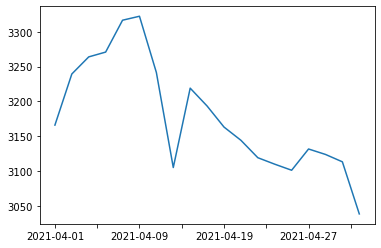

In [91]:
df['close'].plot()

In [96]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
df_sc = scaler.fit_transform(np.array(df['close']).reshape(-1,1))


array([[0.44925988],
       [0.70789299],
       [0.79439789],
       [0.81871042],
       [0.97991544],
       [1.        ],
       [0.71546874],
       [0.23467257],
       [0.63618758],
       [0.54580707],
       [0.43939449],
       [0.37244596],
       [0.28435578],
       [0.25158589],
       [0.22093086],
       [0.32840087],
       [0.30091638],
       [0.26356615],
       [0.        ]])

In [101]:
train_size = int(len(df_sc)*0.65)
test_size = len(df_sc) - train_size

train_data = df_sc[:train_size,:] 
test_data = df_sc[train_size:,:]

In [119]:
k = np.arange(1,21)
k

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [148]:
def create_dataset(data,step=1):
    a=[]
    b=[]
    for i in range(len(data)-step):
        a.append(data[i:i+step])
        b.append(data[i+step])
    return np.array(a),np.array(b)

In [149]:
xtrain,ytrain = create_dataset(train_data,2)

In [150]:
xtest,ytest = create_dataset(test_data,2)

In [154]:
ytrain.shape


(10, 1)